# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder
import random
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

# fechas
from datetime import datetime

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# algoritmos de clasificación
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# algoritmos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# métricas
import sklearn.metrics as metrics

# hiperparametrización
from sklearn.model_selection import GridSearchCV

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

import xgboost as xgb

from numpy import random
random.seed(42)

from sklearn.model_selection import train_test_split

In [2]:
# Configurar pandas para mostrar más valores
np.set_printoptions(threshold=np.inf)

# Cargar datos

In [3]:
file_path = "C:/Users/Herre/Desktop/commercial_activity_df.csv"
file_path_2 = "C:/Users/Herre/Desktop/products_df.csv"
file_path_3 = "C:/Users\Herre\Desktop\sociodemographic_df.csv"

In [4]:
df_comercial_activity = pd.read_csv(file_path)
df_products = pd.read_csv(file_path_2)
df_socialdemographic = pd.read_csv(file_path_3)

# EDA: Análisis Exploratorio

## EDA df_comercial_activity

In [67]:
df_comercial_activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5956511 entries, 0 to 5956510
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           int64         
 1   pk_partition     datetime64[ns]
 2   entry_date       datetime64[ns]
 3   entry_channel    object        
 4   active_customer  float64       
 5   segment          object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 318.1+ MB


In [6]:
df_comercial_activity.head()

,Unnamed: 0,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1,1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
2,2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
3,3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO
4,4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO


In [7]:
columnas_categoricas = df_comercial_activity.select_dtypes(include=['object']).columns.tolist()
columnas_numericas = df_comercial_activity.select_dtypes(include=['int', 'float']).columns.tolist()

In [8]:
for col in columnas_categoricas:
    unique_values = df_comercial_activity[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in pk_partition: ['2018-01-28' '2018-02-28' '2018-03-28' '2018-04-28' '2018-05-28'
 '2018-06-28' '2018-07-28' '2018-08-28' '2018-09-28' '2018-10-28'
 '2018-11-28' '2018-12-28' '2019-01-28' '2019-02-28' '2019-03-28'
 '2019-04-28' '2019-05-28']
Unique values in entry_date: ['2018-01-12' '2015-08-10' '2015-08-16' '2015-08-14' '2015-08-15'
 '2015-08-20' '2015-10-10' '2015-08-17' '2017-07-09' '2017-10-28'
 '2015-12-28' '2015-08-13' '2015-08-31' '2015-08-09' '2015-09-05'
 '2017-09-28' '2015-09-20' '2015-09-04' '2015-09-24' '2015-09-06'
 '2015-09-03' '2015-09-12' '2015-09-17' '2016-01-21' '2015-09-07'
 '2015-09-27' '2017-09-19' '2017-08-28' '2016-03-20' '2015-10-09'
 '2015-09-11' '2015-09-10' '2016-07-26' '2016-07-11' '2016-04-03'
 '2015-08-30' '2017-12-18' '2016-02-21' '2015-08-22' '2015-08-21'
 '2015-08-29' '2015-10-03' '2015-08-23' '2017-01-28' '2015-08-27'
 '2016-12-21' '2015-08-24' '2015-12-20' '2015-08-28' '2015-11-15'
 '2015-10-11' '2017-08-04' '2016-05-08' '2015-08-26' '

Convertir columnas tipo object a tipo datetime

In [66]:
df_comercial_activity['pk_partition'] = pd.to_datetime(df_comercial_activity['pk_partition'], errors='coerce', format='%Y-%m-%d')
df_comercial_activity['entry_date'] = pd.to_datetime(df_comercial_activity['entry_date'], errors='coerce', format='%Y-%m-%d')

## EDA df_products

In [70]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962863 entries, 0 to 5962862
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              int64         
 1   pk_partition        datetime64[ns]
 2   short_term_deposit  int64         
 3   loans               int64         
 4   mortgage            int64         
 5   funds               int64         
 6   securities          int64         
 7   long_term_deposit   int64         
 8   em_account_pp       int64         
 9   credit_card         int64         
 10  payroll             float64       
 11  pension_plan        float64       
 12  payroll_account     int64         
 13  emc_account         int64         
 14  debit_card          int64         
 15  em_account_p        int64         
 16  em_acount           int64         
dtypes: datetime64[ns](1), float64(2), int64(14)
memory usage: 818.9 MB


In [11]:
df_products.head()

,Unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [12]:
columnas_categoricas_1 = df_products.select_dtypes(include=['object']).columns.tolist()
columnas_numericas_1 = df_products.select_dtypes(include=['int', 'float']).columns.tolist()

In [13]:
for col in columnas_categoricas_1:
    unique_values = df_products[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Convertir columnas tipo object a tipo datetime

In [68]:
# Convertir la columna 'pk_partition' a tipo datetime
df_products['pk_partition'] = pd.to_datetime(df_products['pk_partition'], errors='coerce', format='%Y-%m-%d')



In [69]:
df_products['pk_partition'].unique()
#Vemos que se han hecho los cambios

<DatetimeArray>
['2018-01-28 00:00:00', '2018-02-28 00:00:00', '2018-03-28 00:00:00',
 '2018-04-28 00:00:00', '2018-05-28 00:00:00', '2018-06-28 00:00:00',
 '2018-07-28 00:00:00', '2018-08-28 00:00:00', '2018-09-28 00:00:00',
 '2018-10-28 00:00:00', '2018-11-28 00:00:00', '2018-12-28 00:00:00',
 '2019-01-28 00:00:00', '2019-02-28 00:00:00', '2019-03-28 00:00:00',
 '2019-04-28 00:00:00', '2019-05-28 00:00:00']
Length: 17, dtype: datetime64[ns]

## EDA df_socialdemographic

In [73]:
df_socialdemographic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5960635 entries, 0 to 5960634
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   pk_cid        int64         
 1   pk_partition  datetime64[ns]
 2   country_id    object        
 3   region_code   float64       
 4   gender        object        
 5   age           category      
 6   deceased      object        
 7   salary        float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 369.5+ MB


In [17]:
df_socialdemographic.head()

,Unnamed: 0,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,0,1375586,2018-01-28,ES,29.0,H,35,N,87218.10
1,1,1050611,2018-01-28,ES,13.0,V,23,N,35548.74
2,2,1050612,2018-01-28,ES,13.0,V,23,N,122179.11
3,3,1050613,2018-01-28,ES,50.0,H,22,N,119775.54
4,4,1050614,2018-01-28,ES,50.0,V,23,N,NaN


In [18]:
columnas_categoricas_2 = df_socialdemographic.select_dtypes(include=['object']).columns.tolist()
columnas_numericas_2 = df_socialdemographic.select_dtypes(include=['int', 'float']).columns.tolist()

In [19]:
for col in columnas_categoricas_2:
    unique_values = df_socialdemographic[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in country_id: ['ES' 'CA' 'CH' 'CL' 'IE' 'AT' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE' 'US'
 'MX' 'PL' 'MA' 'GT' 'GA' 'CO' 'BR' 'RU' 'IT' 'NO' 'SN' 'MR' 'ET' 'CN'
 'CM' 'SA' 'CI' 'QA' 'LU' 'SE' 'DJ' 'PT' 'JM' 'RO' 'HU' 'DZ' 'PE']
Unique values in gender: ['H' 'V' nan]
Unique values in deceased: ['N' 'S']


Convertir columnas tipo object en tipo datatime

In [71]:
# Convertir la columna 'pk_partition' a tipo datetime
df_socialdemographic['pk_partition'] = pd.to_datetime(df_socialdemographic['pk_partition'])

In [72]:
df_socialdemographic['pk_partition'].unique()
#Vemos que se han hecho los cambios

<DatetimeArray>
['2018-01-28 00:00:00', '2018-02-28 00:00:00', '2018-03-28 00:00:00',
 '2018-04-28 00:00:00', '2018-05-28 00:00:00', '2018-06-28 00:00:00',
 '2018-07-28 00:00:00', '2018-08-28 00:00:00', '2018-09-28 00:00:00',
 '2018-10-28 00:00:00', '2018-11-28 00:00:00', '2018-12-28 00:00:00',
 '2019-01-28 00:00:00', '2019-02-28 00:00:00', '2019-03-28 00:00:00',
 '2019-04-28 00:00:00', '2019-05-28 00:00:00']
Length: 17, dtype: datetime64[ns]

## Análisis Univariable

### Análisis Univariable df_comercial_activity

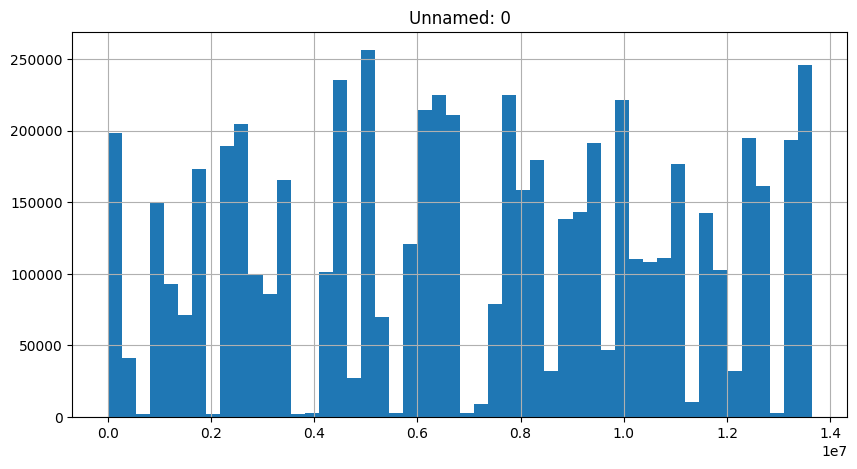

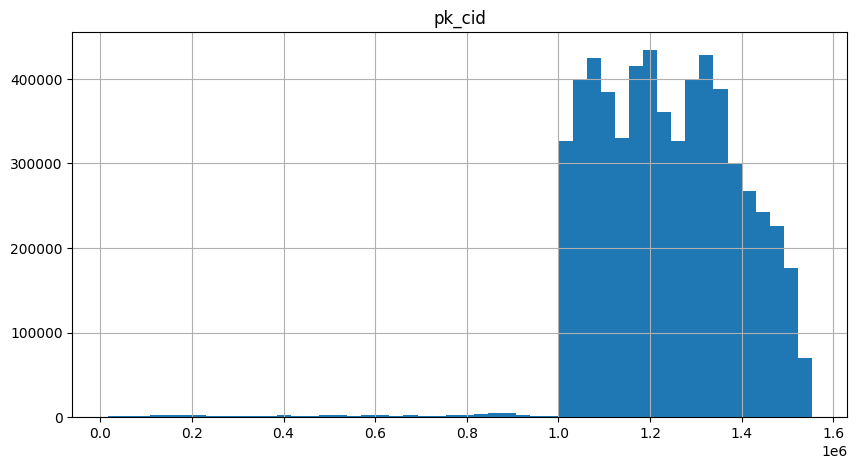

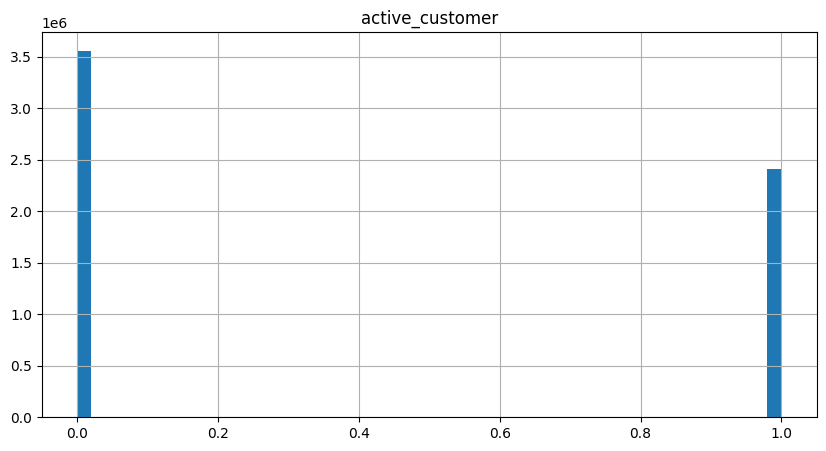

In [22]:
#Primero vamos a hacer los histogramas de las variables numéricas.
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_columns = df_comercial_activity.select_dtypes(include=[int, float]).columns

# Crear gráficos individuales
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    df_comercial_activity[col].hist(bins=50)
    plt.title(col)
    plt.show()

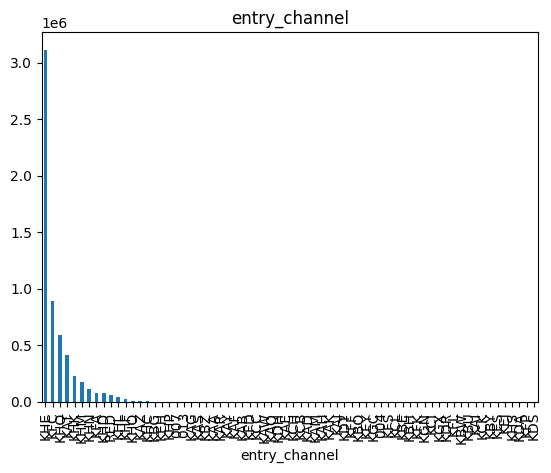

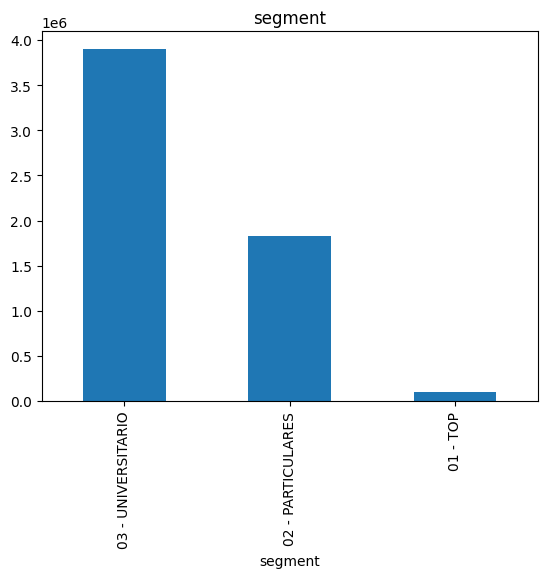

In [23]:
#Ahora crearemos histogramas para todas las columnas categóricas
categorical_columns = df_comercial_activity.select_dtypes(include=[object, 'bool'])
for column in categorical_columns:
    df_comercial_activity[column].value_counts().plot(kind='bar', title=column)
    plt.show()

### Análisis Univariable df_products

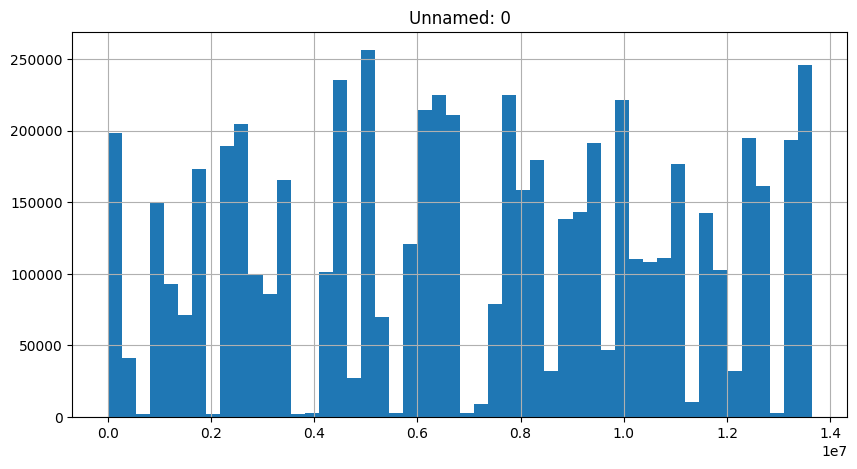

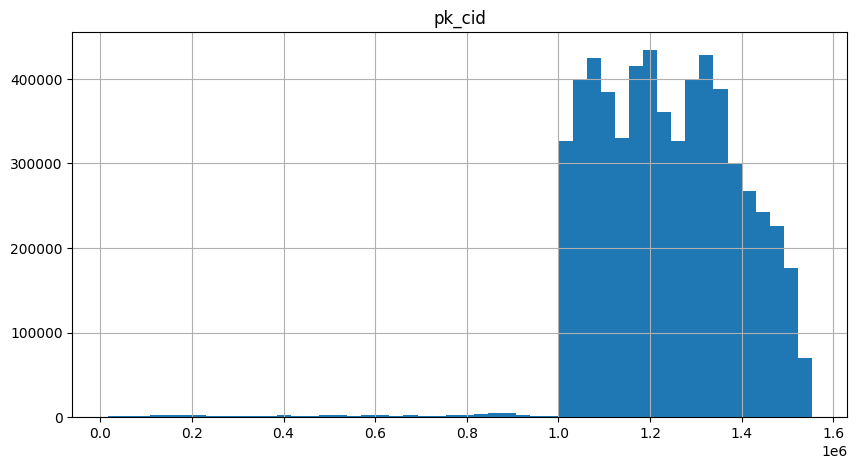

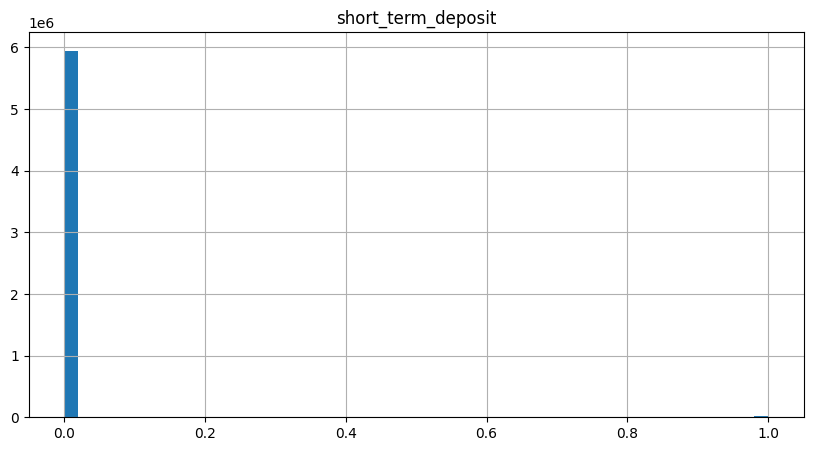

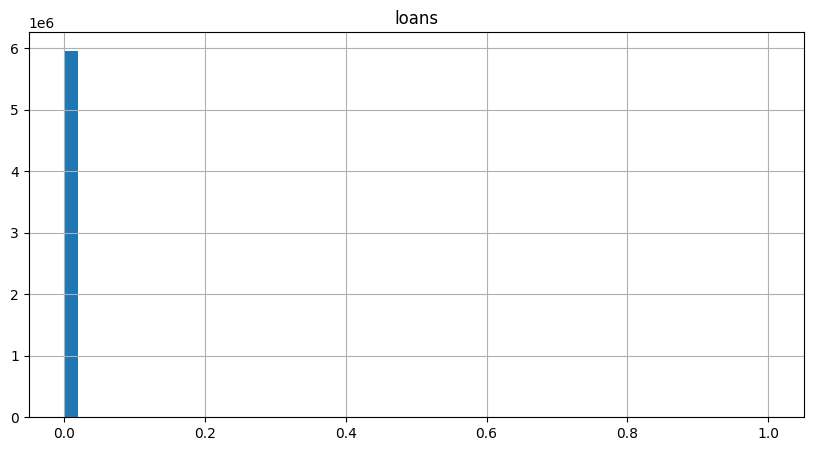

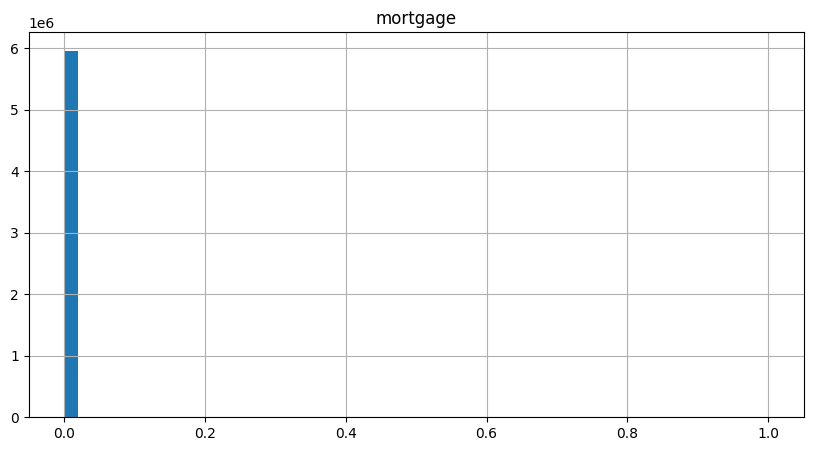

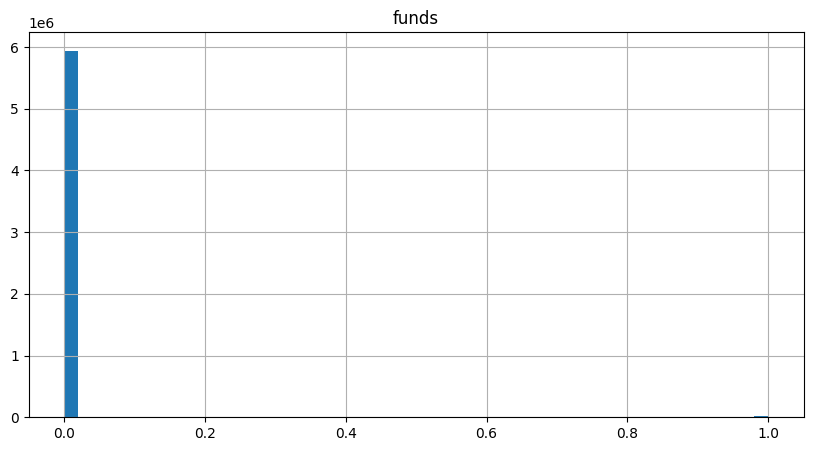

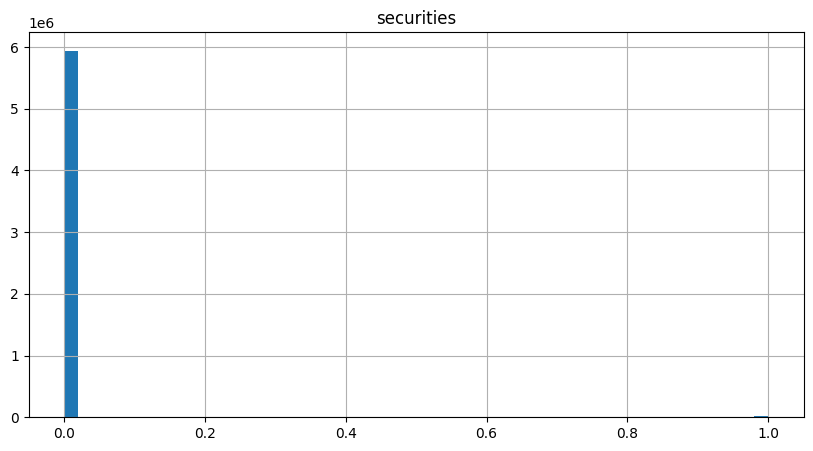

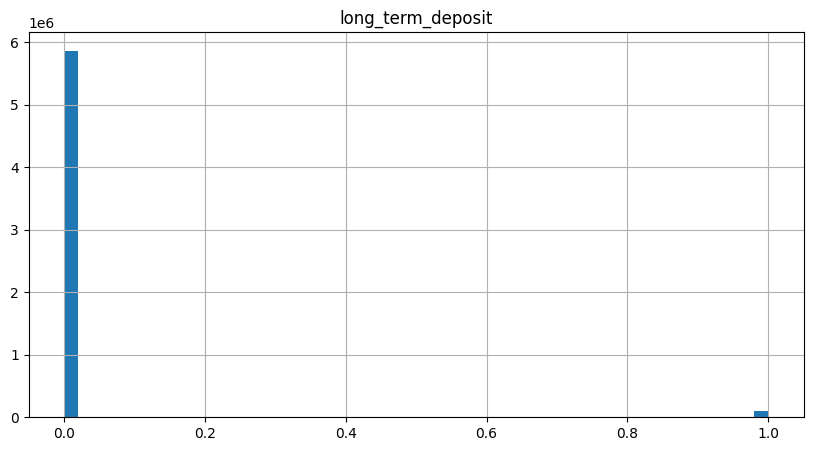

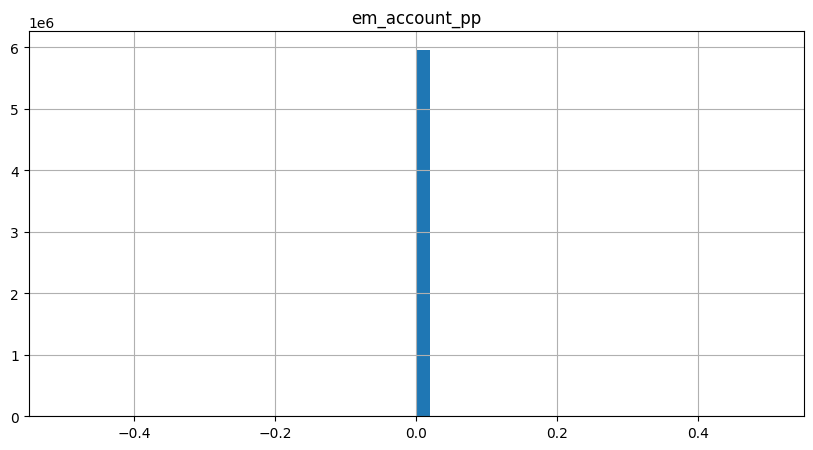

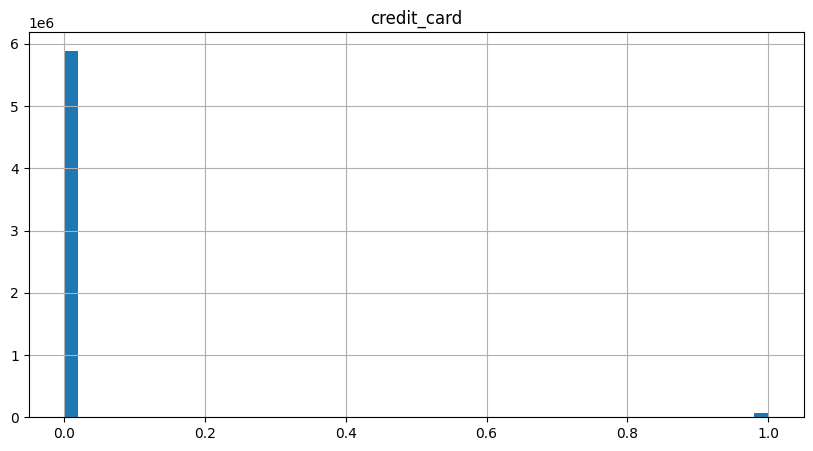

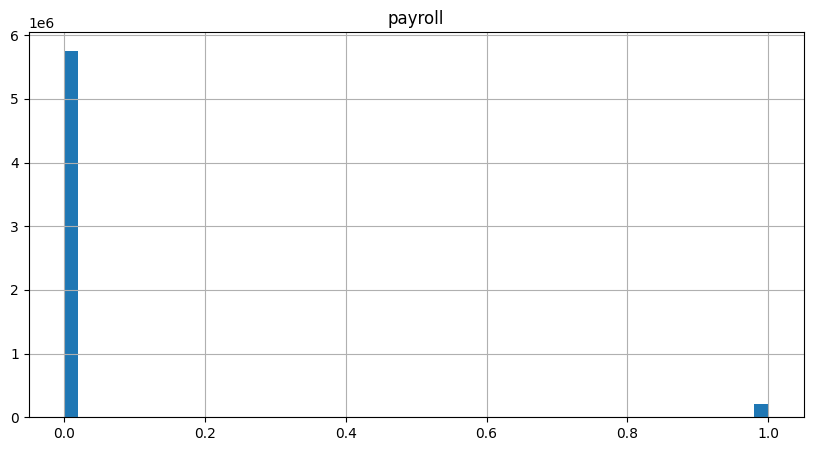

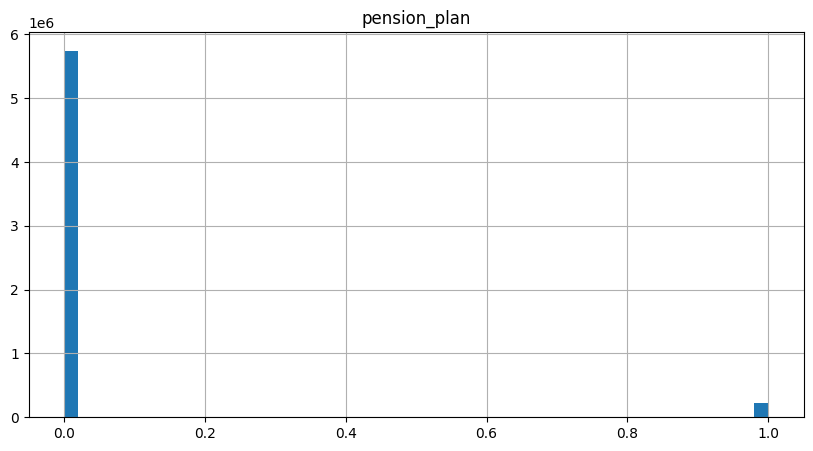

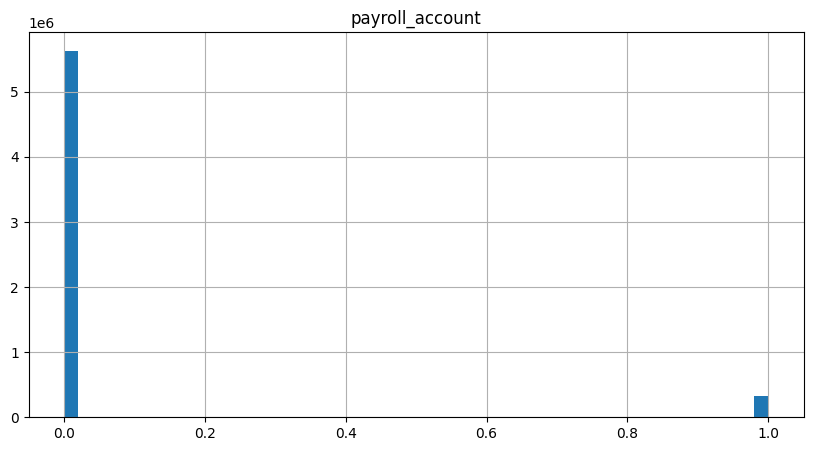

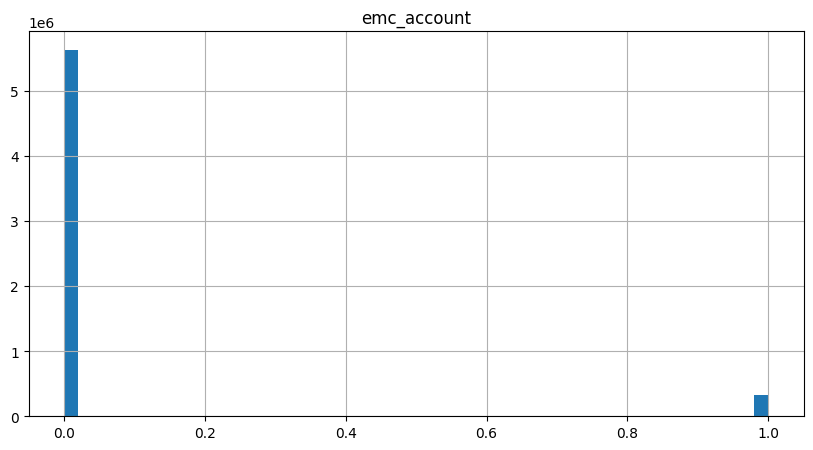

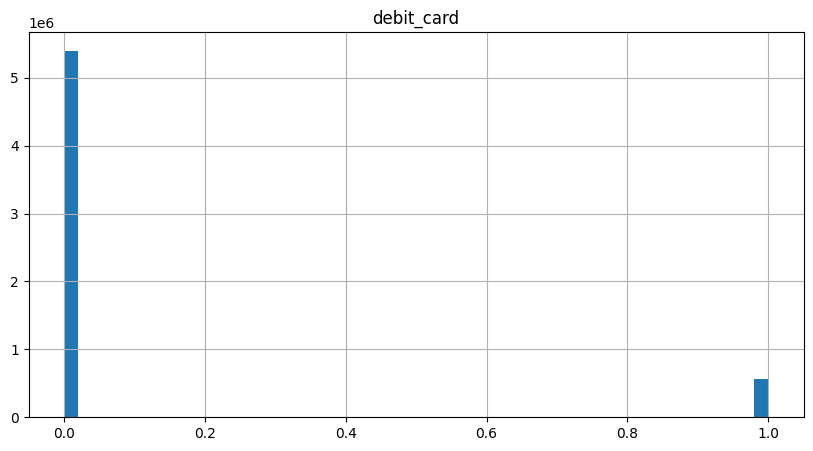

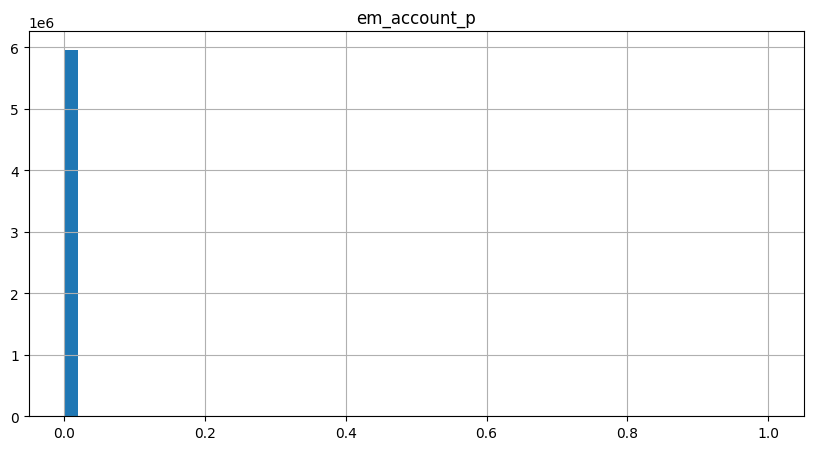

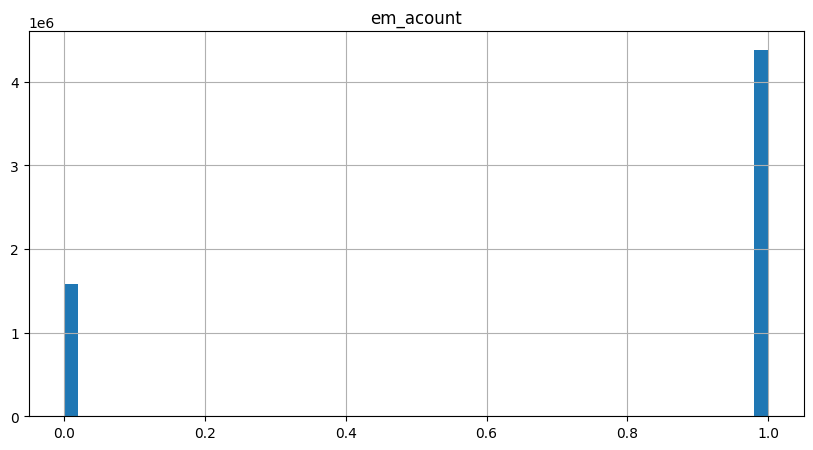

In [24]:
#Primero vamos a hacer los histogramas de las variables numéricas.
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_columns_1 = df_products.select_dtypes(include=[int, float]).columns

# Crear gráficos individuales
for col in numeric_columns_1:
    plt.figure(figsize=(10, 5))
    df_products[col].hist(bins=50)
    plt.title(col)
    plt.show()

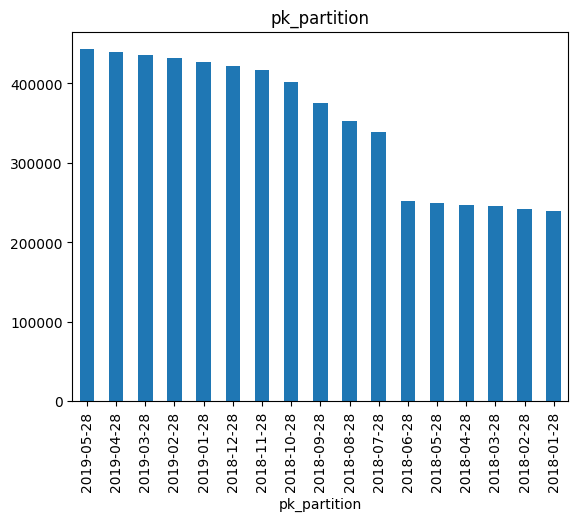

In [26]:
#Ahora crearemos histogramas para todas las columnas categóricas
categorical_columns_1 = df_products.select_dtypes(include=[object])
for column in categorical_columns_1:
    df_products[column].value_counts().plot(kind='bar', title=column)
    plt.show()

### Análisis Univariable df_socialdemographic

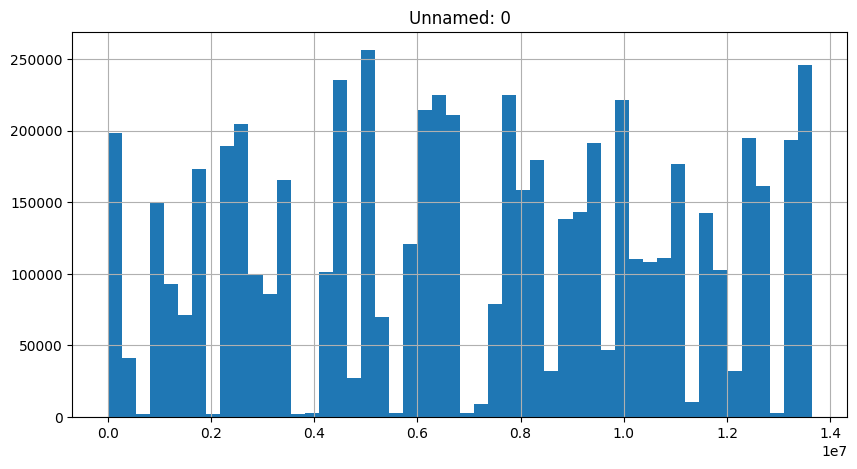

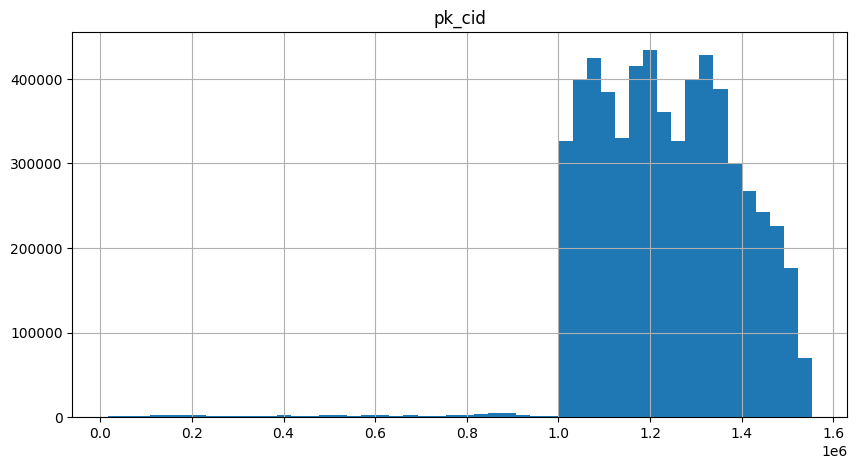

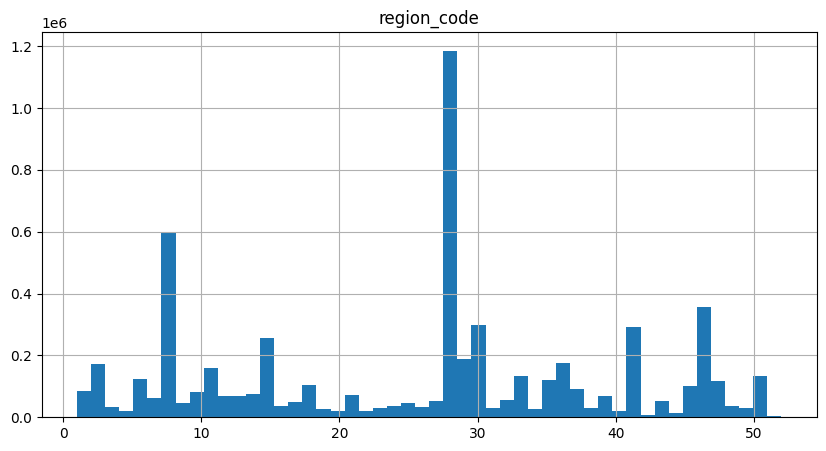

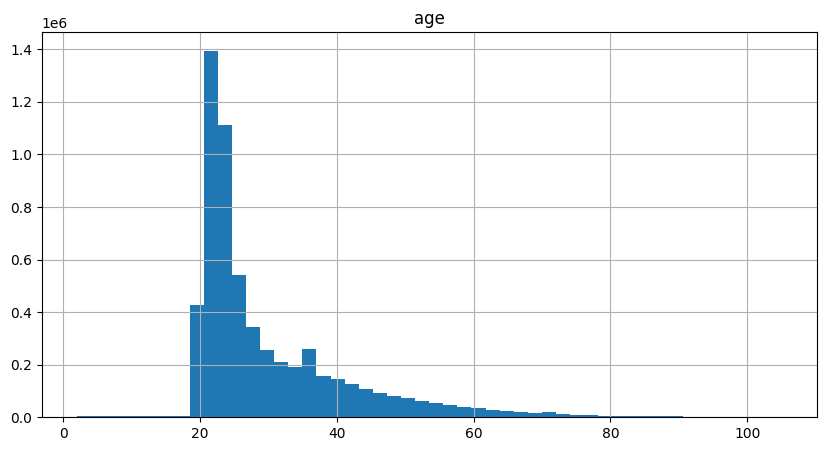

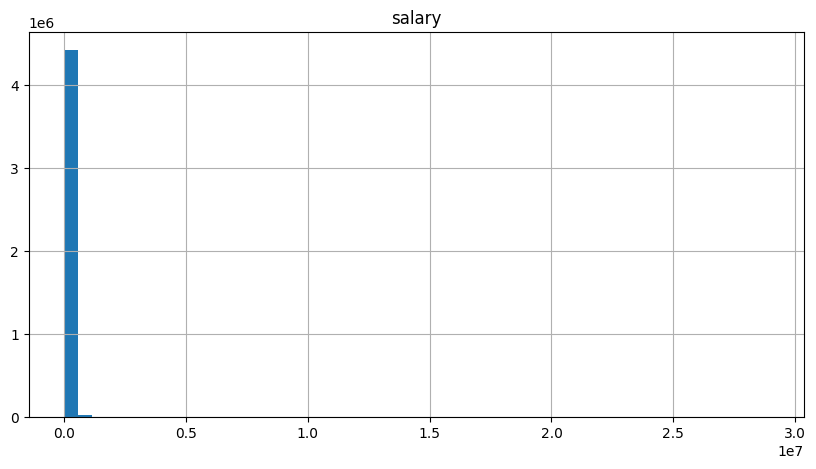

In [27]:
#Primero vamos a hacer los histogramas de las variables numéricas.
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_columns_2 = df_socialdemographic.select_dtypes(include=[int, float]).columns

# Crear gráficos individuales
for col in numeric_columns_2:
    plt.figure(figsize=(10, 5))
    df_socialdemographic[col].hist(bins=50)
    plt.title(col)
    plt.show()

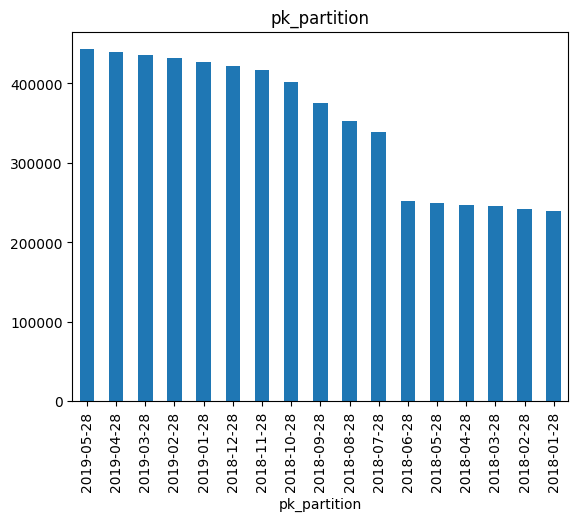

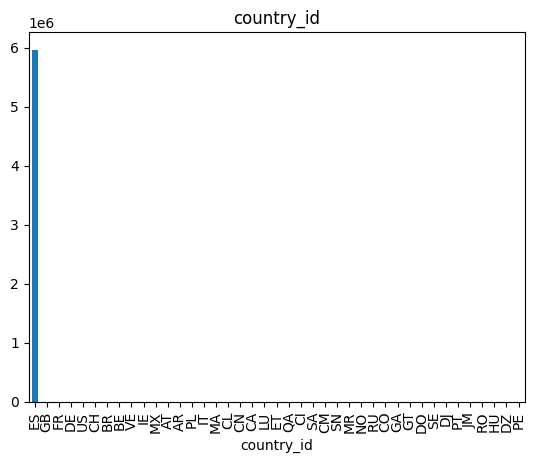

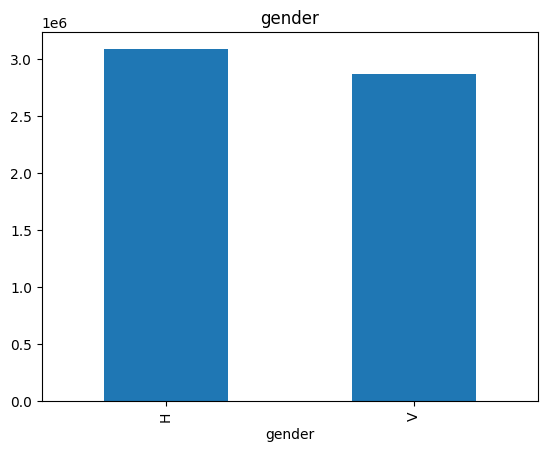

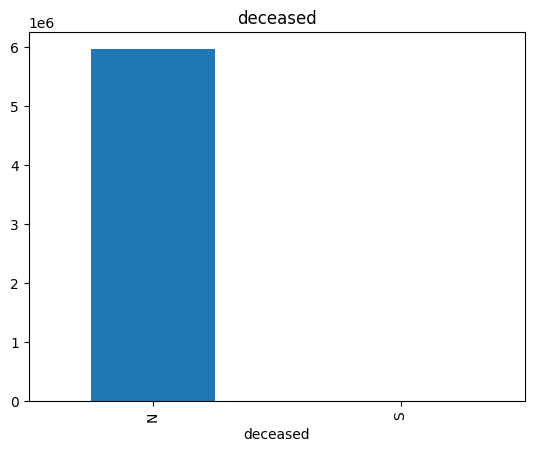

In [28]:
#Ahora crearemos histogramas para todas las columnas categóricas
categorical_columns_2 = df_socialdemographic.select_dtypes(include=[object, 'bool'])
for column in categorical_columns_2:
    df_socialdemographic[column].value_counts().plot(kind='bar', title=column)
    plt.show()

# Data Cleaning

In [29]:
#Ver duplicados de filas exactas

In [30]:
df_comercial_activity[df_comercial_activity.duplicated(keep=False)]

,Unnamed: 0,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment


In [31]:
df_products[df_products.duplicated(keep=False)]

,Unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount


In [32]:
df_socialdemographic[df_socialdemographic.duplicated(keep=False)]

,Unnamed: 0,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary


## NULOS

### Nulos df_comercial_activity

In [33]:
#Vemos los nulos que hay en cada columna
df_comercial_activity.isnull().sum()

Unnamed: 0              0
pk_cid                  0
pk_partition            0
entry_date           6413
entry_channel      133033
active_customer         0
segment            133944
dtype: int64

In [ ]:
# Como previamente hemos hecho una visualización de las columnas y sus variables ya tenemos una idea clara de las acciones que vamos a realizar con cada columna.

In [34]:
# Eliminamos la columna Unnamed

df_comercial_activity.drop(columns=['Unnamed: 0'], inplace=True)

Nulos columna "entry_date"

In [35]:
df_comercial_activity = df_comercial_activity.dropna(subset=['entry_date'])

Nulos columna "entry_channel"

In [36]:
df_comercial_activity['entry_channel'].value_counts(normalize=True)

entry_channel
KHE    5.346357e-01
KFC    1.527951e-01
KHQ    1.013456e-01
KAT    7.140100e-02
KHK    3.952010e-02
           ...     
KES    1.888597e-06
KEJ    1.373525e-06
KHS    8.584534e-07
KDA    3.433814e-07
KFP    3.433814e-07
Name: proportion, Length: 67, dtype: float64

In [37]:
#Vamos a imputar los nulos en base al porcentaje que ocupan sobre el total sus variables.

# Calcular el porcentaje de cada categoría en entry_channel
porcentajes = df_comercial_activity['entry_channel'].value_counts(normalize=True)

# Número de nulos en la columna entry_channel
nulos_count = df_comercial_activity['entry_channel'].isnull().sum()

# Crear una lista para almacenar las categorías de acuerdo al porcentaje
nulos_relleno = []

for categoria, porcentaje in porcentajes.items():
    count_categoria = int(round(porcentaje * nulos_count))
    nulos_relleno.extend([categoria] * count_categoria)

# Ajustar la lista en caso de diferencias debido a redondeos
if len(nulos_relleno) < nulos_count:
    diferencia = nulos_count - len(nulos_relleno)
    nulos_relleno.extend(np.random.choice(porcentajes.index, diferencia, p=porcentajes.values))
elif len(nulos_relleno) > nulos_count:
    nulos_relleno = nulos_relleno[:nulos_count]

# Barajar la lista de relleno para distribuir aleatoriamente los valores
np.random.shuffle(nulos_relleno)

# Rellenar los nulos en la columna entry_channel
df_comercial_activity.loc[df_comercial_activity['entry_channel'].isnull(), 'entry_channel'] = nulos_relleno

# Verificar el resultado
print(df_comercial_activity['entry_channel'].isnull().sum())
print(df_comercial_activity['entry_channel'].value_counts(normalize=True))


0
entry_channel
KHE    5.346363e-01
KFC    1.527955e-01
KHQ    1.013457e-01
KAT    7.140103e-02
KHK    3.952028e-02
           ...     
KBY    1.846719e-06
KEJ    1.343068e-06
KHS    8.394176e-07
KDA    3.357670e-07
KFP    3.357670e-07
Name: proportion, Length: 67, dtype: float64


In [38]:
#Una vez imputados los nulos agrupamos todas quellas variables que representan muy poco porcentaje sobre el total, de esta forma reducimos variables.
#Vamos a agrupar todas aquellas variables que representen el 2% o menos
# Calcular el porcentaje de cada categoría en entry_channel
porcentajes = df_comercial_activity['entry_channel'].value_counts(normalize=True)

# Identificar las categorías con porcentaje menor o igual al 2%
categorias_bajas = porcentajes[porcentajes <= 0.02].index

# Reemplazar las categorías de bajo porcentaje con "Otros"
df_comercial_activity['entry_channel'] = df_comercial_activity['entry_channel'].replace(categorias_bajas, 'Otros')

# Verificar el resultado
print(df_comercial_activity['entry_channel'].value_counts(normalize=True))


entry_channel
KHE      0.534636
KFC      0.152795
KHQ      0.101346
KAT      0.071401
Otros    0.070508
KHK      0.039520
KHM      0.029793
Name: proportion, dtype: float64


Nulos columna "segment"

In [39]:
#Imputaremos los nulos con la palabra "Unknown"
df_comercial_activity['segment'].fillna('Unknown', inplace=True)

In [40]:
df_comercial_activity.reset_index(drop=True,inplace=True)

### Nulos df_products

In [41]:
df_products.isnull().sum()

Unnamed: 0             0
pk_cid                 0
pk_partition           0
short_term_deposit     0
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit      0
em_account_pp          0
credit_card            0
payroll               61
pension_plan          61
payroll_account        0
emc_account            0
debit_card             0
em_account_p           0
em_acount              0
dtype: int64

In [42]:
#Eliminamos la columna Unnamed

df_products.drop(columns=['Unnamed: 0'], inplace=True)

In [43]:
#En esta base de datos la cantidad de nulos no es significativa así que los vamos a eliminar.
df_products = df_products.dropna(subset=['payroll', 'pension_plan'])

In [45]:
df_products.reset_index(drop=True,inplace=True)

### Nulos df_socialdemographic

In [46]:
df_socialdemographic.isnull().sum()

Unnamed: 0            0
pk_cid                0
pk_partition          0
country_id            0
region_code        2264
gender               25
age                   0
deceased              0
salary          1512103
dtype: int64

In [47]:
#Eliminamos la columna Unnamed

df_socialdemographic.drop(columns=['Unnamed: 0'], inplace=True)

In [48]:
#Primero vamos a agrupar todas las variables menos (ES) de la columna "country_id" en una sola variable llamada Otros
# Agrupar todas las variables menos 'ES' en 'Otros' para la columna 'country_id'
df_socialdemographic['country_id'] = df_socialdemographic['country_id'].apply(lambda x: x if x == 'ES' else 'Otros')

# Verificar el resultado
df_socialdemographic['country_id'].value_counts()


country_id
ES       5960672
Otros       2252
Name: count, dtype: int64


In [49]:
#Ahora vamos a agrupar las cariables de la columna "age" en varios grupos de edades

# Definir los límites de los grupos de edad
bins = [0, 17, 25, 35, 45, 65, 110]

# Definir los nombres de los grupos de edad
labels = ['0-17', '18-25', '26-35', '36-45', '46-65', '66-110']

#Poner títulos a los rangos de edad (falta código Ivan)

# Agrupar las edades en los intervalos especificados
df_socialdemographic['age'] = pd.cut(df_socialdemographic['age'], bins=bins, labels=labels, right=False)

# Verificar el resultado
df_socialdemographic['age'].value_counts()

age
18-25     2935117
26-35     1545217
36-45      744912
46-65      571455
66-110     132261
0-17        33962
Name: count, dtype: int64


In [50]:
#En esta base de datos hay columnas con pocos nulos así que los vamos a eliminar
df_socialdemographic = df_socialdemographic.dropna(subset=['region_code', 'gender'])

In [ ]:
# De momento no vamos a elimianr nulos de la columna "salary"

In [51]:
df_socialdemographic.reset_index(drop=True,inplace=True)

# Ordenar dataframe por fecha de mas atigua a mas nueva

In [74]:
# Ordenar el DataFrame por la columna 'pk_partition' de más antiguo a más nuevo
df_socialdemographic = df_socialdemographic.sort_values(by='pk_partition', ascending=True)
df_products = df_products.sort_values(by='pk_partition', ascending=True)
df_comercial_activity = df_comercial_activity.sort_values(by='pk_partition', ascending=True)

In [75]:
df_socialdemographic["pk_partition"].unique()

<DatetimeArray>
['2018-01-28 00:00:00', '2018-02-28 00:00:00', '2018-03-28 00:00:00',
 '2018-04-28 00:00:00', '2018-05-28 00:00:00', '2018-06-28 00:00:00',
 '2018-07-28 00:00:00', '2018-08-28 00:00:00', '2018-09-28 00:00:00',
 '2018-10-28 00:00:00', '2018-11-28 00:00:00', '2018-12-28 00:00:00',
 '2019-01-28 00:00:00', '2019-02-28 00:00:00', '2019-03-28 00:00:00',
 '2019-04-28 00:00:00', '2019-05-28 00:00:00']
Length: 17, dtype: datetime64[ns]

In [76]:
df_products["pk_partition"].unique()

<DatetimeArray>
['2018-01-28 00:00:00', '2018-02-28 00:00:00', '2018-03-28 00:00:00',
 '2018-04-28 00:00:00', '2018-05-28 00:00:00', '2018-06-28 00:00:00',
 '2018-07-28 00:00:00', '2018-08-28 00:00:00', '2018-09-28 00:00:00',
 '2018-10-28 00:00:00', '2018-11-28 00:00:00', '2018-12-28 00:00:00',
 '2019-01-28 00:00:00', '2019-02-28 00:00:00', '2019-03-28 00:00:00',
 '2019-04-28 00:00:00', '2019-05-28 00:00:00']
Length: 17, dtype: datetime64[ns]

In [77]:
df_comercial_activity["pk_partition"].unique()

<DatetimeArray>
['2018-01-28 00:00:00', '2018-02-28 00:00:00', '2018-03-28 00:00:00',
 '2018-04-28 00:00:00', '2018-05-28 00:00:00', '2018-06-28 00:00:00',
 '2018-07-28 00:00:00', '2018-08-28 00:00:00', '2018-09-28 00:00:00',
 '2018-10-28 00:00:00', '2018-11-28 00:00:00', '2018-12-28 00:00:00',
 '2019-01-28 00:00:00', '2019-02-28 00:00:00', '2019-03-28 00:00:00',
 '2019-04-28 00:00:00', '2019-05-28 00:00:00']
Length: 17, dtype: datetime64[ns]

# Quedarnos con las fechas más recientes

VEMOS QUE HAY CLIENTES QUE ESTÁN REPETIDOS, NOS QUEDAMOS CON SU INFORMACIÓN MAS RCIENTE, ES DECIR, QUE NOS QUEDAMOS CON UN SOLA "FILA" POR CLIENTE  (LA QUE TENGA LA FECHA MÁS RECIENTE, ESO EN TODOS LOD DF Y LUEGO INTENTAMOS HACER UN MERGE, PRIMERO CON "PK_CID" Y LUEGO JUNTAMOS LOS 2 DF QUE QUEDAN A APRTIR DE LA COLUMNA "PK_PARTITION" PORQUE SE SUPONE QUE TENEMOS LAS MISMAS FECHAS EN AMBOS DF)

Hay que tener en cuenta que para unir df_comercial_activity y df_socialdemographic solo se puede hacer a través de la columna "pk_cid", por lo tanto, lo primero que hay que hacer es quedarnos con la info de cada cliente pero sin que esté repetida, nos quedamos con la información con fecha más reciente.

In [78]:
df_comercial_activity["pk_cid"].value_counts()

pk_cid
1375586    17
1328875    17
1328876    17
1328878    17
1328861    17
           ..
1537544     1
269752      1
103082      1
1454265     1
1550586     1
Name: count, Length: 454899, dtype: int64

In [79]:
df_products["pk_cid"].value_counts()

pk_cid
1375586    17
1328781    17
1328783    17
1328784    17
1329194    17
           ..
1545224     1
1471155     1
1470941     1
1470991     1
1550586     1
Name: count, Length: 456373, dtype: int64

In [80]:
df_socialdemographic["pk_cid"].value_counts()

pk_cid
1375586    17
1328792    17
1331512    17
1328795    17
1328797    17
           ..
1470991     1
1521049     1
1470941     1
1545248     1
1550586     1
Name: count, Length: 456225, dtype: int64

### df_comercial_activity usuarios con fecha más reciente

In [81]:
# Quedarse con la transacción más reciente por usuario (pk_cid)
df_comercial_activity_recent = df_comercial_activity.sort_values('pk_partition').groupby('pk_cid').tail(1).reset_index(drop=True)

In [82]:
df_comercial_activity_recent["pk_cid"].value_counts()

pk_cid
1298102    1
324456     1
335944     1
336162     1
337281     1
          ..
1156208    1
1156207    1
1156206    1
1156205    1
1550586    1
Name: count, Length: 454899, dtype: int64

In [85]:
df_comparison = df_comercial_activity_recent[['pk_cid', 'pk_partition']]
df_comparison

,pk_cid,pk_partition
0,1298102,2018-07-28
1,1297423,2018-07-28
2,1299811,2018-07-28
3,1299907,2018-07-28
4,1299380,2018-07-28
...,...,...
454894,1490985,2019-05-28
454895,1490986,2019-05-28
454896,1490987,2019-05-28
454897,1490991,2019-05-28


### df_socialdemographic usuarios con fecha más reciente

In [86]:
# Quedarse con la transacción más reciente por usuario (pk_cid)
df_socialdemographic_recent = df_socialdemographic.sort_values('pk_partition').groupby('pk_cid').tail(1).reset_index(drop=True)

In [88]:
df_socialdemographic_recent["pk_cid"].value_counts()

pk_cid
1298102    1
330234     1
327661     1
327602     1
332622     1
          ..
1156521    1
1156395    1
1156449    1
1156448    1
1550586    1
Name: count, Length: 456225, dtype: int64

In [89]:
df_comparison_1 = df_comercial_activity_recent[['pk_cid', 'pk_partition']]
df_comparison_1

,pk_cid,pk_partition
0,1298102,2018-07-28
1,1297423,2018-07-28
2,1299811,2018-07-28
3,1299907,2018-07-28
4,1299380,2018-07-28
...,...,...
454894,1490985,2019-05-28
454895,1490986,2019-05-28
454896,1490987,2019-05-28
454897,1490991,2019-05-28


### df_products usuarios con fecha más reciente

In [90]:
# Quedarse con la transacción más reciente por usuario (pk_cid)
df_products_recent = df_products.sort_values('pk_partition').groupby('pk_cid').tail(1).reset_index(drop=True)

In [91]:
df_products_recent["pk_cid"].value_counts()

pk_cid
1298102    1
326850     1
324291     1
323415     1
336613     1
          ..
1156348    1
1156347    1
1156346    1
1156345    1
1550586    1
Name: count, Length: 456373, dtype: int64

In [92]:
df_comparison_2 = df_products_recent[['pk_cid', 'pk_partition']]
df_comparison_2

,pk_cid,pk_partition
0,1298102,2018-07-28
1,1297423,2018-07-28
2,1299907,2018-07-28
3,1299811,2018-07-28
4,1299380,2018-07-28
...,...,...
456368,1489282,2019-05-28
456369,1489283,2019-05-28
456370,1489285,2019-05-28
456371,1489271,2019-05-28


# Merge

Antes de seguir haciendo limpieza hay que hacer un merge de los 3 deaframes

In [93]:
# Fusionar df_comercial_activity y df_products por 'pk_cid' 
df_merged = pd.merge(df_comercial_activity_recent, df_products_recent, on='pk_cid', how='inner', suffixes=('_comercial', '_product'))

In [94]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454899 entries, 0 to 454898
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   pk_cid                  454899 non-null  int64         
 1   pk_partition_comercial  454899 non-null  datetime64[ns]
 2   entry_date              454899 non-null  datetime64[ns]
 3   entry_channel           454899 non-null  object        
 4   active_customer         454899 non-null  float64       
 5   segment                 454899 non-null  object        
 6   pk_partition_product    454899 non-null  datetime64[ns]
 7   short_term_deposit      454899 non-null  int64         
 8   loans                   454899 non-null  int64         
 9   mortgage                454899 non-null  int64         
 10  funds                   454899 non-null  int64         
 11  securities              454899 non-null  int64         
 12  long_term_deposit       454899

In [95]:
#Vamos a borrar la columna "pk_partition_product" porque está duplicada y a parte es type object
df_merged.drop(columns=['pk_partition_product'], inplace=True)

In [96]:
df_merged = df_merged.rename(columns={'pk_partition_comercial': 'pk_partition'})
#Cambiamos el nombre de la columna para dejar el nombre estandar de antes

In [97]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454899 entries, 0 to 454898
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   pk_cid              454899 non-null  int64         
 1   pk_partition        454899 non-null  datetime64[ns]
 2   entry_date          454899 non-null  datetime64[ns]
 3   entry_channel       454899 non-null  object        
 4   active_customer     454899 non-null  float64       
 5   segment             454899 non-null  object        
 6   short_term_deposit  454899 non-null  int64         
 7   loans               454899 non-null  int64         
 8   mortgage            454899 non-null  int64         
 9   funds               454899 non-null  int64         
 10  securities          454899 non-null  int64         
 11  long_term_deposit   454899 non-null  int64         
 12  em_account_pp       454899 non-null  int64         
 13  credit_card         454899 no

In [98]:
# Fusionar el resultado con df_socialdemographic por 'pk_cid'
df_final = pd.merge(df_merged, df_socialdemographic_recent, on='pk_cid', how='inner', suffixes=('_merged', '_social'))

In [99]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454751 entries, 0 to 454750
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   pk_cid               454751 non-null  int64         
 1   pk_partition_merged  454751 non-null  datetime64[ns]
 2   entry_date           454751 non-null  datetime64[ns]
 3   entry_channel        454751 non-null  object        
 4   active_customer      454751 non-null  float64       
 5   segment              454751 non-null  object        
 6   short_term_deposit   454751 non-null  int64         
 7   loans                454751 non-null  int64         
 8   mortgage             454751 non-null  int64         
 9   funds                454751 non-null  int64         
 10  securities           454751 non-null  int64         
 11  long_term_deposit    454751 non-null  int64         
 12  em_account_pp        454751 non-null  int64         
 13  credit_card   

# Eportamos el df_final a un archivo .csv para hacer la segmentación

In [100]:
# Guardar resultados
df_final.to_csv('df_final.csv', index=False)